In [47]:
# All libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [48]:
# Load in the data
files = ['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']

all_data = pd.DataFrame()
for file in files:
    # Read in each file
    car_data = pd.read_csv("./resources/"+file, sep=";")

    # Remove unrelated columns
    car_data = car_data.drop(columns=['Unnamed: 0'])

    # Concatenate the data together
    all_data = pd.concat([all_data, car_data], ignore_index=True, sort=False)

all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23771,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23772,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23773,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [49]:
# Preprocessing (before separation)

## Drop any values that have NaN
all_data = all_data.dropna()

## Downsampling the data to balance the data set - https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/
all_data_even_style = all_data[all_data["drivingStyle"] == "EvenPaceStyle"]
all_data_aggressive_style = all_data[all_data["drivingStyle"] == "AggressiveStyle"]

all_data_even_style_downsample = resample(all_data_even_style, replace=True, n_samples=len(all_data_aggressive_style), random_state=42)

all_data = pd.concat(objs=[all_data_even_style_downsample, all_data_aggressive_style])
all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
18302,-0.099998,60.299999,38.849999,198.056428,0.000000,1.4528,16.078432,54.0,107.0,1752.5,22.799999,21.0,0.0294,13.684338,FullOfHolesCondition,LowCongestionCondition,EvenPaceStyle
1041,-2.000000,26.571239,57.432157,94.243465,-5.629498,0.8200,24.705883,60.0,99.0,1043.0,7.030000,13.0,-0.2810,13.212004,UnevenCondition,LowCongestionCondition,EvenPaceStyle
6574,-2.000000,23.869080,15.368535,103.176675,-2.026621,-0.1796,0.000000,81.0,108.0,1680.0,16.469999,20.0,0.3164,24.548452,SmoothCondition,LowCongestionCondition,EvenPaceStyle
14176,2.799999,66.599998,49.904999,148.969285,1.800003,0.4438,76.862747,58.0,142.0,1963.5,28.049999,35.0,0.3359,13.684533,SmoothCondition,LowCongestionCondition,EvenPaceStyle
13448,-2.900002,54.899998,18.584999,468.724317,-1.799999,1.2885,0.000000,54.0,107.0,1617.0,20.629999,21.0,0.5247,13.504065,FullOfHolesCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23451,0.299999,34.200001,29.289997,108.921447,0.900002,-0.6414,0.000000,62.0,105.0,1433.0,17.219999,20.0,0.4918,16.800100,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23452,-0.200001,35.099998,29.267536,108.625580,0.899998,-0.6774,0.000000,62.0,105.0,1391.0,16.990000,19.0,0.5121,16.856285,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23453,-0.899998,34.200001,29.244898,108.367584,-0.899998,-0.7386,0.000000,62.0,105.0,1326.5,16.379999,19.0,0.5276,16.932764,UnevenCondition,NormalCongestionCondition,AggressiveStyle
23454,0.000000,32.399998,29.191227,107.850024,-1.800003,-0.6565,0.000000,62.0,104.0,1271.0,15.740000,19.0,0.5660,17.011122,UnevenCondition,NormalCongestionCondition,AggressiveStyle


In [50]:
# Determine X (input) and y (output) - y in this case, will be drivingStyle
x_data = all_data.copy().drop(columns=['roadSurface', 'traffic', 'drivingStyle'])
y_data = all_data[['drivingStyle']]

print(x_data.head())
print(y_data.head())

       AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
18302          -0.099998                  60.299999            38.849999   
1041           -2.000000                  26.571239            57.432157   
6574           -2.000000                  23.869080            15.368535   
14176           2.799999                  66.599998            49.904999   
13448          -2.900002                  54.899998            18.584999   

       VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
18302            198.056428               0.000000                    1.4528   
1041              94.243465              -5.629498                    0.8200   
6574             103.176675              -2.026621                   -0.1796   
14176            148.969285               1.800003                    0.4438   
13448            468.724317              -1.799999                    1.2885   

       EngineLoad  EngineCoolantTemperature  ManifoldAbsoluteP

In [51]:
# Pre-processing (after conversion)

# Normalise values
x_data = x_data.to_numpy()
x_data = preprocessing.normalize(x_data)

# Label Encoder
le_driving_style = preprocessing.LabelEncoder()
le_driving_style.fit(y_data)
y_data = le_driving_style.transform(y_data)

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [52]:
# Split into different data sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)
X_train

array([[-1.46788218e-03,  2.96303102e-02,  3.55012842e-02, ...,
         9.43637514e-03, -8.17819179e-05,  6.55186189e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.53905558e-02, ...,
         2.23833629e-02,  1.47258967e-04,  3.03341180e-02],
       [ 0.00000000e+00,  0.00000000e+00,  8.81873256e-03, ...,
         1.99768948e-02, -5.65720690e-04,  1.91826838e-02],
       ...,
       [-6.37905808e-04,  1.49389352e-02,  2.68134766e-03, ...,
         7.65486970e-03,  2.27562265e-04,  9.83888547e-03],
       [ 7.29009428e-04,  4.18269537e-02,  4.00431575e-02, ...,
         2.18703037e-02,  1.66897755e-04,  5.76341847e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.97120302e-02, ...,
         2.01375225e-02,  2.35727469e-04,  1.24485988e-02]])

----
# Algorithm 1: Logistic Regression

In [53]:
# Libraries
from sklearn.linear_model import LogisticRegression

In [54]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [55]:
model_logistic.score(X_test, y_test)

0.6173913043478261

In [56]:
y_logis_pred = model_logistic.predict(X_test)
y_logis_pred

array([1, 0, 1, ..., 0, 1, 1])

In [57]:
y_logis_predprob = model_logistic.predict_proba(X_test)
y_logis_predprob

array([[0.36841613, 0.63158387],
       [0.55618454, 0.44381546],
       [0.44444865, 0.55555135],
       ...,
       [0.55335709, 0.44664291],
       [0.35247598, 0.64752402],
       [0.41115272, 0.58884728]])

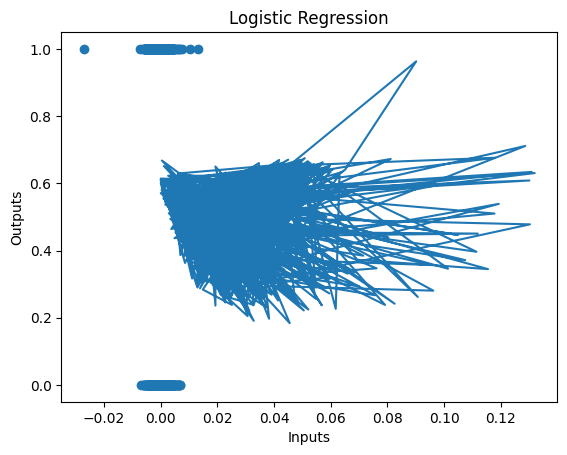

In [58]:
plt.scatter(x_data[:,0], y_data)
axes = plt.gca()
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Logistic Regression')

plt.plot(X_test[:,2], y_logis_predprob[:,1])

Output predicted is mostly 1s due to input.

---
# Algorithm 2: k-Nearest Neighbours

In [59]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

## Method 1: No kFold

In [60]:
model_knn = make_pipeline(
    preprocessing.StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [61]:
model_knn.score(X_test, y_test)

0.8072463768115942

## Method 2: With kFold

In [62]:
n_folds = 5
ks = range(11)
train_scores = np.zeros((len(ks), n_folds))
valid_scores = np.zeros((len(ks), n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)

for k in ks:
    if k == 0:
        continue

    print(k)
    fold = 0
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        knn = make_pipeline(
            preprocessing.StandardScaler(),
            KNeighborsClassifier(n_neighbors=9)
        )
        knn.fit(X_c, y_c)
        train_scores[k, fold] = knn.score(X_c, y_c)
        valid_scores[k, fold] = knn.score(X_val, y_val)
        fold += 1

1
2
3
4
5
6
7
8
9
10


In [63]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [64]:
bestk = np.argmax(mean_valid_scores)
bestk

1

In [65]:
mean_valid_scores[bestk]

0.795073865727354

---
# Algorithm 3: Support Vector Machine (SVM)

In [66]:
# Libraries Needed
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [67]:
# Define variables for each kernels - "linear", "rbf", "poly"
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale']
degrees = [2,3,4,5,6,7,8,9]

In [68]:
param_grid = [
  {'svc__C': Cs, 'svc__kernel': ['linear']},
  {'svc__C': Cs, 'svc__gamma': gammas, 'svc__kernel': ['rbf']},
    {'svc__C': Cs, 'svc__degree': degrees, 'svc__kernel': ['poly']}
 ]

In [69]:
model_svm_pipeline = make_pipeline(
        preprocessing.StandardScaler(),
        SVC(kernel='linear')
)

In [70]:
model_svm_grid = GridSearchCV(model_svm_pipeline, param_grid=param_grid, verbose=2)

In [71]:
model_svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 136 candidates, totalling 680 fits
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.2s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.1s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.1s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.1s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   0.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.1s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   0.1s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   0.1s
[CV] END ....................svc__C=0.01, svc_

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                         'scale'],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__degree': [2, 3, 4, 5, 6, 7, 8, 9],
                          'svc__kernel': ['poly']}],
             verbose=2)

In [72]:
model_svm_grid.best_params_

{'svc__C': 2, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

In [73]:
model_svm_grid.best_score_

0.8523482817237088

In [74]:
model_svm = model_svm_grid.best_estimator_

In [75]:
model_svm.score(X_test, y_test)

0.8507246376811595